In [48]:
#Libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pickle
import random
import sys
import pandas as pd
from sklearn.metrics import confusion_matrix
#for plot theme
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 200
from jupyterthemes import jtplot
jtplot.style(theme='monokai')

# Importing Data

In [18]:
with open('german-traffic-signs/test.p','rb') as f:
    test_data = pickle.load(f)

In [19]:
X_test, y_test = test_data['features'], test_data['labels']
print(X_test.shape)

(12630, 32, 32, 3)


In [20]:
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels"
assert(X_test.shape[1:] == (32, 32, 3)), "The dimensions of the image is not 32*32*3"

# Data pre-processing

(32, 32, 3)
22


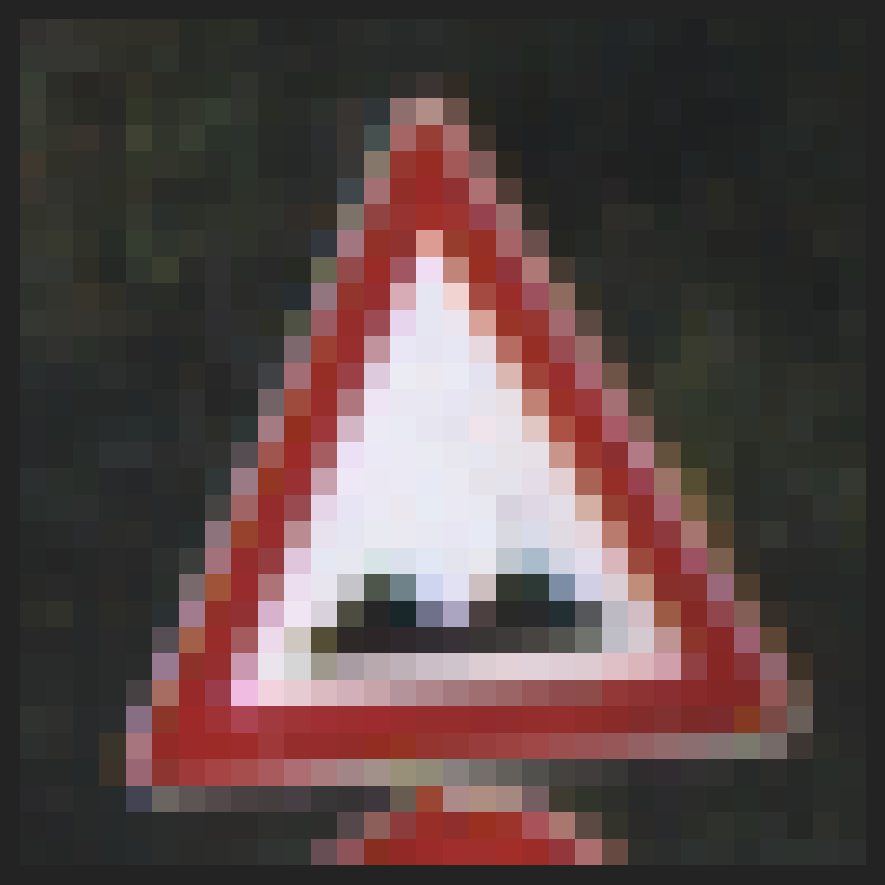

In [21]:
plt.imshow(X_test[500])
plt.axis('off')
print(X_test[500].shape)
print(y_test[500])

In [22]:
#same funtions used for pre-procesing of training data
def grayscale(img):
    image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.axis('off')
    return image

def equalize(img):
    img = cv2.equalizeHist(img)
    return img

def preprocessing(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255
    return img

(32, 32)


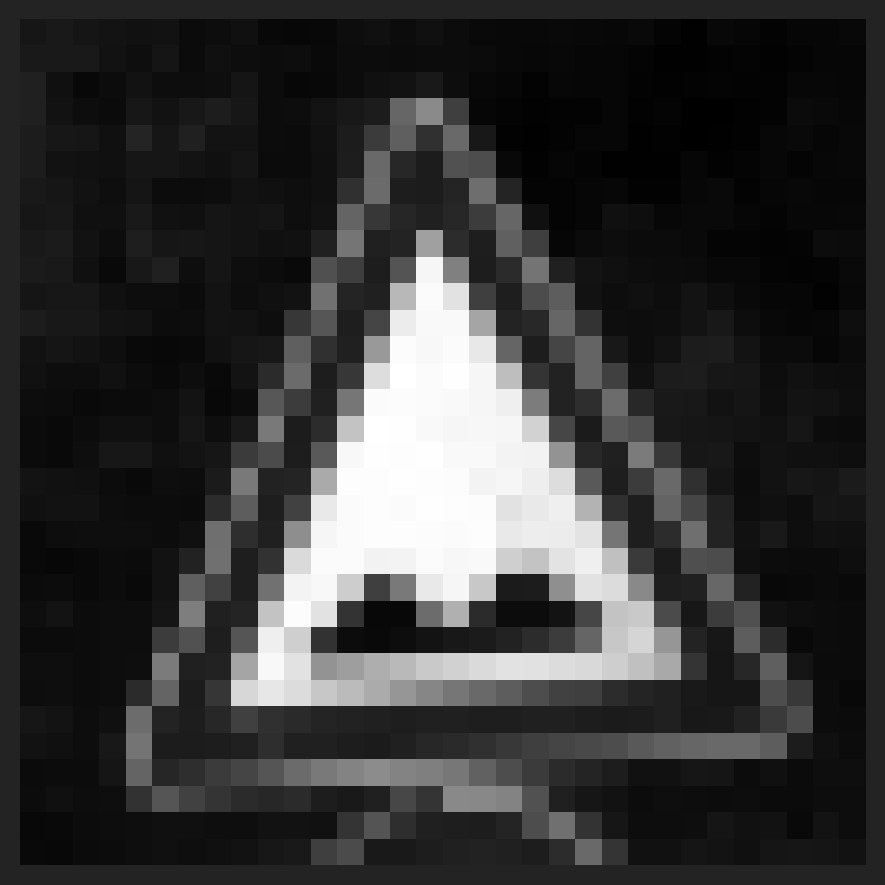

In [23]:
img = grayscale(X_test[500])
plt.imshow(img, cmap = 'gray')
print(img.shape)

(32, 32)


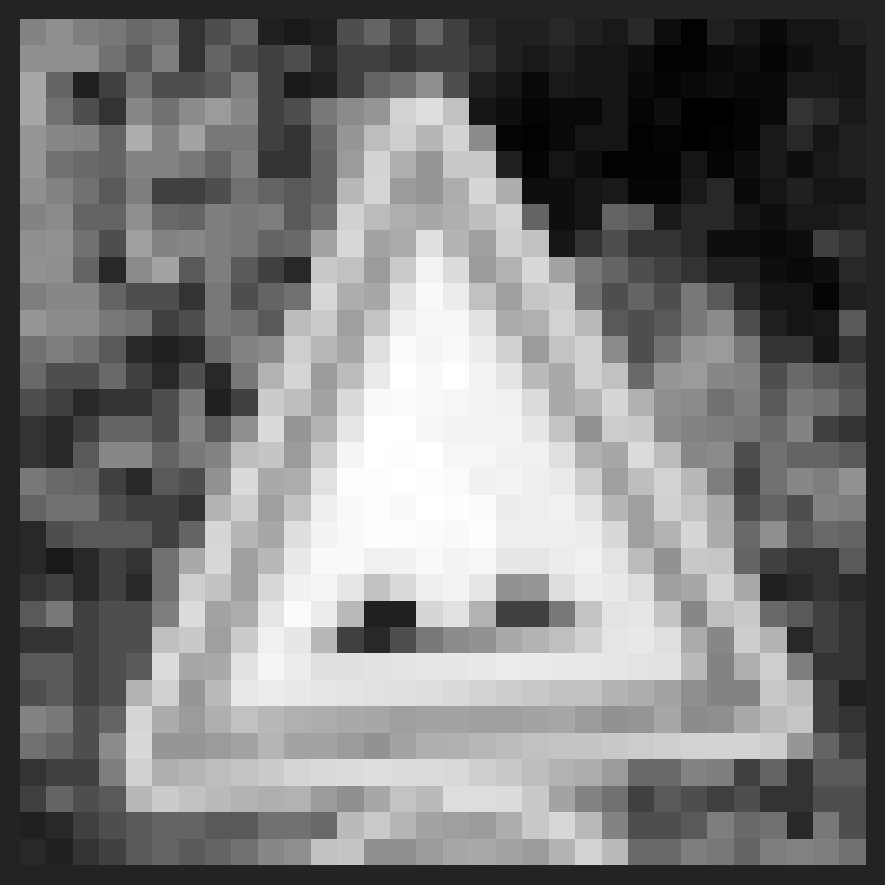

In [24]:
img = equalize(img)
plt.imshow(img, cmap = 'gray')
plt.axis('off')
print(img.shape)

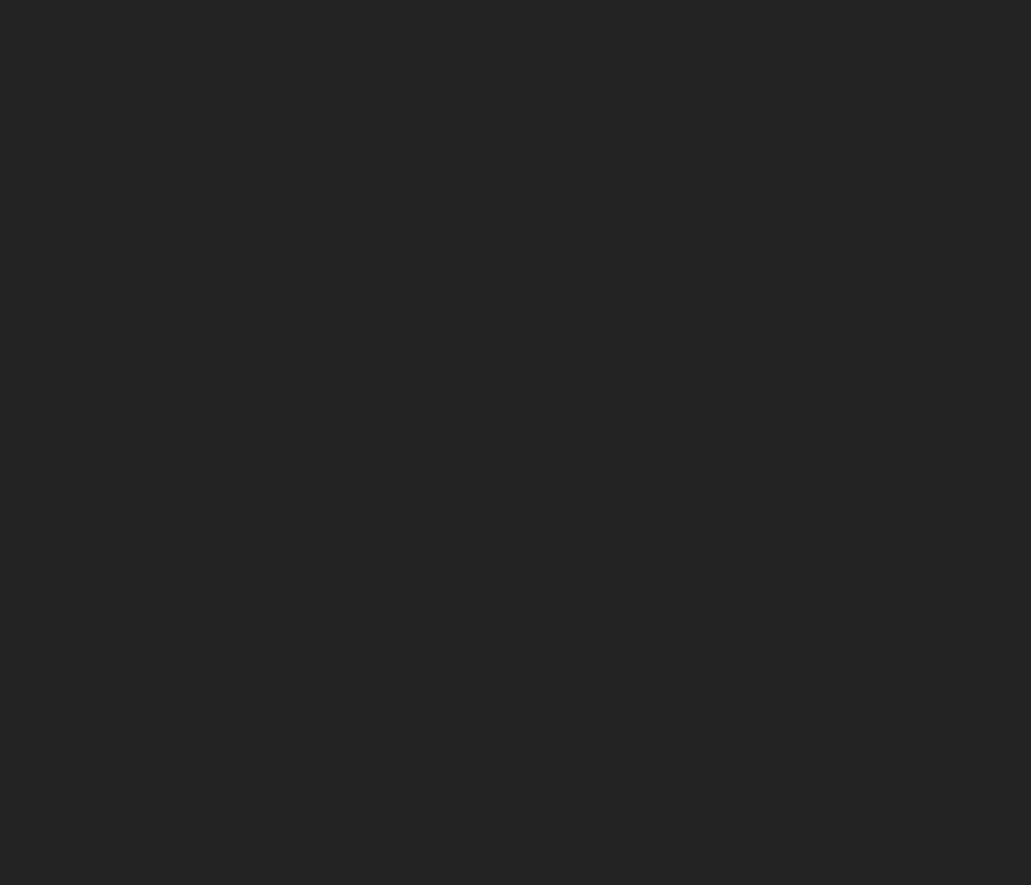

In [25]:
X_test = np.array(list(map(preprocessing, X_test)))

In [59]:
X_test = X_test.reshape(12630, 32, 32, 1)
y_test = to_categorical(y_test, 43)

# Loading trained model for testing

In [51]:
from tensorflow.keras.models import load_model
model=load_model('trained_model.h5')

In [53]:
score = model.evaluate(X_test, y_test, verbose = 1)
print('Test Loss', score[0])
print('Test Accuracy', score[1])

12630/12630 [==============================] - 6s 480us/sample - loss: 0.1352 - accuracy: 0.9730
Test Loss 0.13516281337808375
Test Accuracy 0.97300076


In [57]:
#Confusion matrix
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([16,  1, 38, 33, 11, 38, 18, 12, 25, 35, 12,  7, 23,  7,  4,  9, 31,
       20, 27, 38,  4, 33,  9,  3,  1, 11, 13, 10,  9, 11,  5, 17, 34, 23,
        2, 17,  3, 12, 16,  8,  7, 31, 18, 12, 24, 25,  3, 10, 18,  8, 26,
       13, 15,  9, 13, 35,  5, 26,  9, 16, 38, 10,  4,  9, 15,  9, 18,  2,
        5, 28, 11, 25, 30, 34,  5, 12,  1, 10, 25, 25, 21, 33, 25,  7, 10,
       35,  3,  7, 22, 13,  3,  1,  2, 14, 12, 32,  3, 38,  9, 33,  1, 10,
        5, 11, 33,  4, 35, 25, 33,  4,  1, 14, 16, 10, 23,  3, 18, 29,  1,
       17, 13,  7,  1,  8,  2, 10, 10, 30,  1,  6, 36,  3, 14, 13, 11, 10,
       18, 40,  2, 38, 41,  4,  6, 18, 17, 25,  2, 41, 11, 21,  7, 24, 11,
       25, 17,  3,  6,  9,  7,  4, 13, 16,  4, 27, 18,  9, 13, 14, 29, 17,
       13, 38, 26, 25, 33,  1,  5, 40, 13,  2,  8,  4, 36, 25, 20, 25, 18,
        1, 10,  8, 10, 29, 12, 38, 31,  2,  8, 38, 28, 28, 17,  9,  4,  1,
       17,  9,  2, 31, 13, 15, 15, 38, 25,  5, 25, 13, 10,  5,  4, 10,  2,
        4,  5,  1, 14, 12